In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import import_ipynb
import os
import warnings
import Lib.Functions as fc
warnings.filterwarnings('ignore')

importing Jupyter notebook from /Users/vuhan/Desktop/LDS6_269C7N5_ON_VuTranHoaiHan_MidExam/Lib/Functions.ipynb


# Evaluating Text Classification Model

Load dữ liệu Test cho mô hình bằng hàm `load_dataset` đã viết trong file `Training_Model` và lưu trong thư viện __Lib__:

In [2]:
folder_name = 'bbc_test'
df = fc.load_dataset(folder_name)
df.head()

,Text,Class
0,Top gig award for Scissor Sisters New York ba...,entertainment
1,Brits return Keane to number one Brits succes...,entertainment
2,U2 to play at Grammy awards show Irish rock b...,entertainment
3,Queen recruit singer for new tour The remaini...,entertainment
4,Triple triumph for Little Britain Top TV cult...,entertainment


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 51
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    287 non-null    object
 1   Class   287 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


Ta sẽ xem qua các lớp trong dữ liệu test:

----- Class -----
Describe: 
count               287
unique                4
top       entertainment
freq                 88
Name: Class, dtype: object
* Unique value: 
entertainment    88
business         80
politics         67
tech             52
Name: Class, dtype: int64
* Mode value: entertainment
* Number of missing value: 0


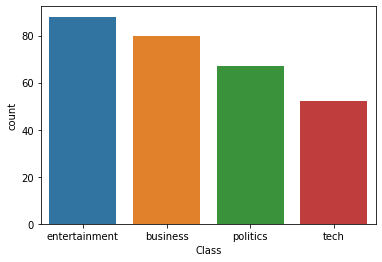

In [4]:
fc.categorical_analysis(df, 'Class')

In [5]:
X = df.iloc[:, 0]
y = df.iloc[:, -1]

Load mô hình dự đoán và đánh giá trên bộ dữ liệu Test, hàm `load_model` được viết sẵn trong folder __Lib__:

In [6]:
text_clf_model = fc.load_model('Text_Classification_VuTranHoaiHan.pkl')

In [7]:
fc.eval_clf_testset(text_clf_model, X, y)

----- CLASSIFICATION MODEL PREFOMANCE IN TEST SET-----
* R-squared model of Test: 0.9861

* Confusion Matrix of Test: 
[[78  0  2  0]
 [ 0 86  0  2]
 [ 0  0 67  0]
 [ 0  0  0 52]]

* Classification Report of Test: 
               precision    recall  f1-score   support

     business       1.00      0.97      0.99        80
entertainment       1.00      0.98      0.99        88
     politics       0.97      1.00      0.99        67
         tech       0.96      1.00      0.98        52

     accuracy                           0.99       287
    macro avg       0.98      0.99      0.99       287
 weighted avg       0.99      0.99      0.99       287



Mô hình hoạt động khá tốt trên dữ liệu test. Bộ phân loại biểu quyết cho điểm số `f1-score` cao và khá tương đồng giữa các lớp.

Các thành phần trong mô hình:

In [8]:
text_clf_model

Pipeline(steps=[('cv', CountVectorizer(stop_words='english')),
                ('voting_clf',
                 VotingClassifier(estimators=[('multiNB', MultinomialNB()),
                                              ('logit_clf',
                                               LogisticRegression(multi_class='ovr',
                                                                  random_state=42)),
                                              ('svc',
                                               SVC(C=1, gamma=0.001,
                                                   kernel='linear',
                                                   probability=True,
                                                   random_state=42)),
                                              ('forest_clf',
                                               RandomForestClassifier(bootstrap=False,
                                                                      n_estimators=120,
                                  